In [2]:
%pwd

'C:\\Users\\HP\\Documents\\Deepak\\ALabs\\proj\\4. Segmentation of Credit Card Customers'

In [3]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
print(os.listdir("../"))

['--.completed- 2,6', '.ipynb_checkpoints', '0. ML Conceptual Tests.rar', '1. Predicting Credit Card Spend & Identifying Key Drivers.rar', '2. Walmart Store Sales Forecasting', '2. Walmart Store Sales Forecasting.rar', '3. Network Intrusion Detection System.zip', '4. Segmentation of Credit Card Customers', '4. Segmentation of Credit Card Customers.rar', '5. Bank Reviews-Complaints Analysis', '5. Bank Reviews-Complaints Analysis.rar', '6. Analyzing online Job Postings', '6. Analyzing online Job Postings.rar', 'Cheat Sheets.rar', 'Data Science with Python - Final Projects 24JAN2019.pdf', 'Expecations from submissions- Updated.xlsx', 'FE Webscraping', 'Hints for Projects.rar', 'Key Topics for Recap.pdf', 'Sample output Templates.rar', 'Untitled.ipynb']


In [5]:
cc_input = pd.read_csv("CC_GENERAL.csv")

In [6]:
cc_input.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
cc_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [8]:
cc_input.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
cc_input.fillna?

In [10]:
cc_input = cc_input.drop(["CUST_ID"] , axis=1)

In [11]:
cc_input.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
cc_input.fillna(method='ffill' , inplace = True)

In [18]:
scaler =  StandardScaler()
scaled_df = scaler.fit_transform(cc_input)

In [19]:
normalized_df = normalize(scaled_df)

In [20]:
#nd = pd.DataFrame(normalized_df)
#sd = pd.DataFrame(scaled_df)

#nd.to_csv("normalised.csv")
#sd.to_csv("scaled.csv")

In [21]:
PCA?

In [22]:
pca = PCA(n_components=2)

In [29]:
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P001', 'P002']

In [30]:
X_principal

,P001,P002
0,-0.489949,-0.679977
1,-0.519099,0.544828
2,0.330633,0.268880
3,-0.481657,-0.097618
4,-0.563512,-0.482504
...,...,...
8945,0.328693,-0.198294
8946,0.259752,-0.176869
8947,0.188818,-0.248156
8948,-0.313093,-0.171110


In [31]:
n_cluster = 30
cost = []

for i in range(1,n_cluster):
    kmean = KMeans(i)
    kmean.fit(scaled_df)
    cost.append(kmean.inertia_)  


In [32]:
cost

[152149.99999999997,
 127784.80451470052,
 112001.07510331966,
 99093.62788949451,
 91522.1542883243,
 84872.11427396096,
 79903.85544346852,
 76187.90297917296,
 71108.43018055303,
 67000.53834654491,
 63653.34464942828,
 61393.99997586552,
 59190.630718999964,
 57507.32962917659,
 55888.525892308404,
 54684.597321956055,
 53027.61460925689,
 51952.146380645914,
 50715.24204263726,
 49720.419734131036,
 49077.50389608227,
 47672.70739822788,
 46785.04016207941,
 46206.10323934135,
 45503.55561927607,
 44563.63334607292,
 43768.55045520418,
 43014.20060969408,
 42270.67543591294]

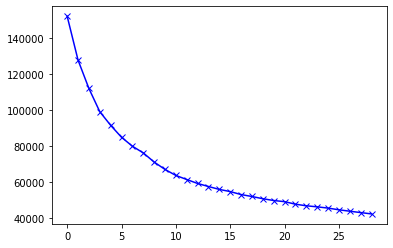

In [33]:
plt.plot(cost, 'bx-')

In [34]:
kmean= KMeans(6)
kmean.fit(scaled_df)
labels=kmean.labels_

In [35]:
labels

array([5, 1, 3, ..., 0, 5, 5])

In [36]:
clusters=pd.concat([cc_input, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


In [37]:
#clusters.to_csv("Clusters.csv")

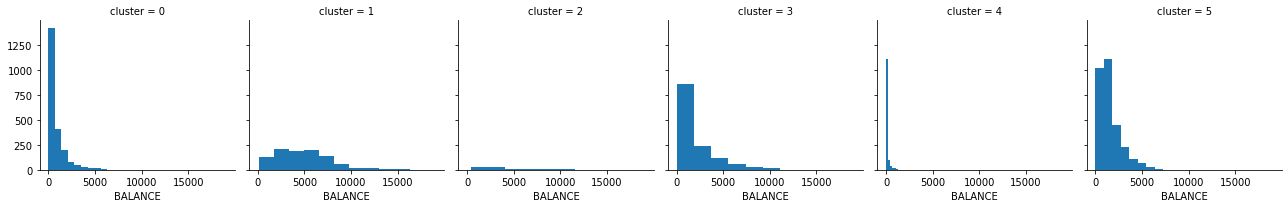

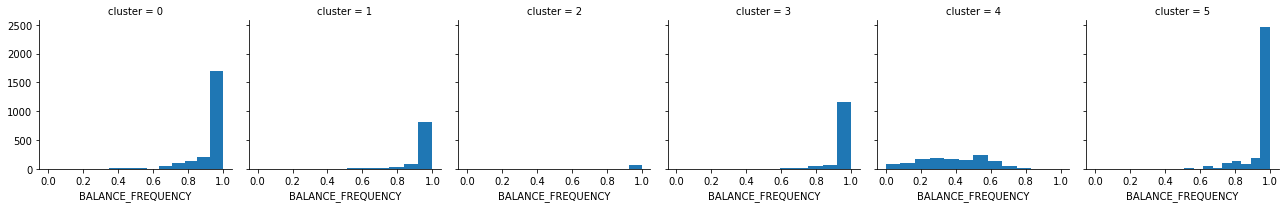

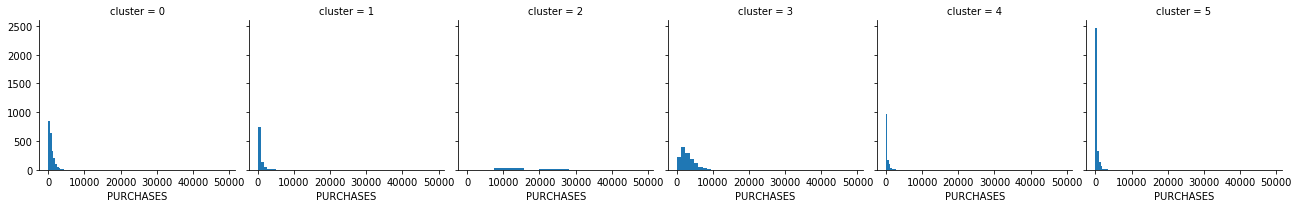

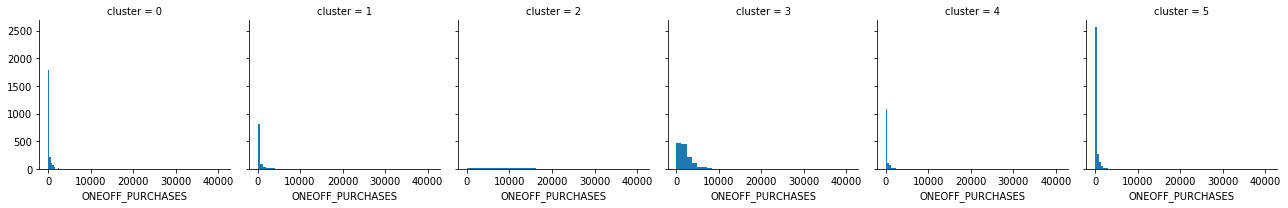

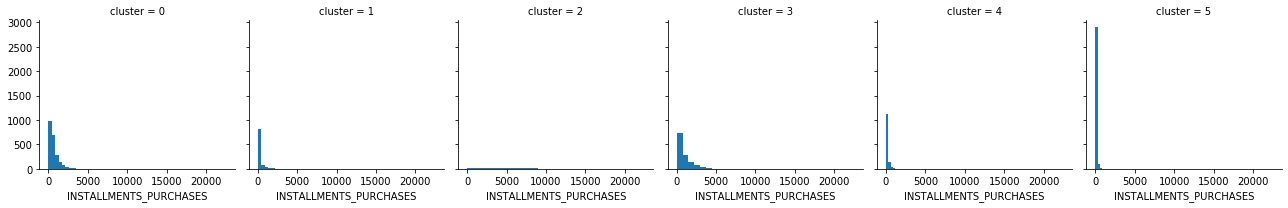

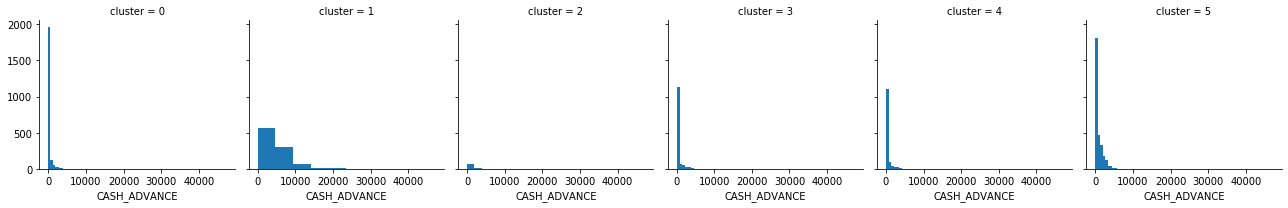

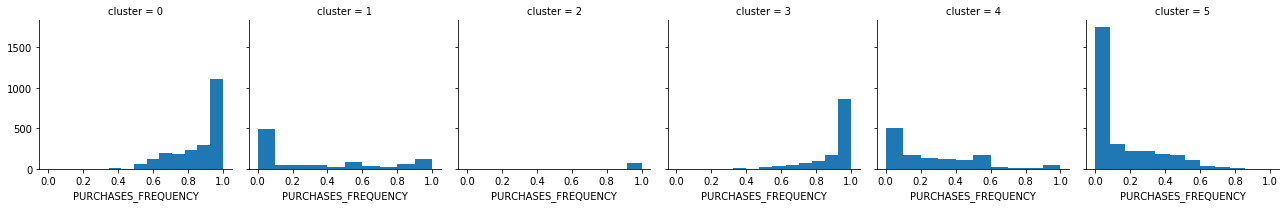

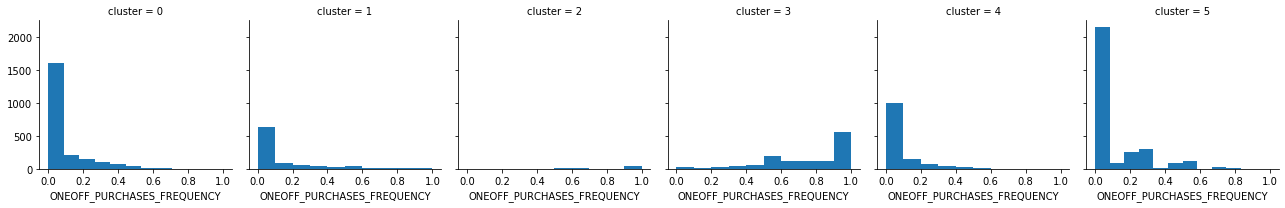

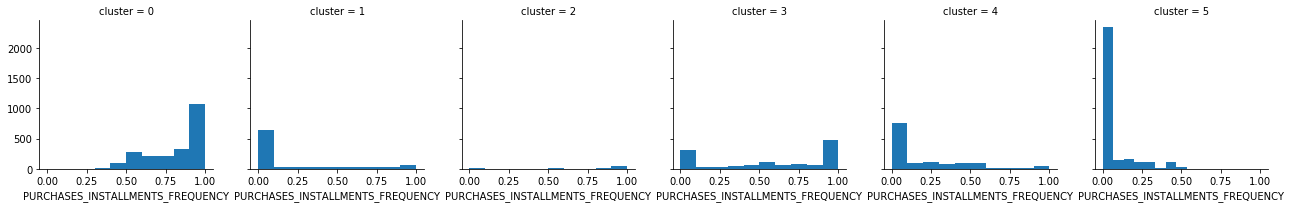

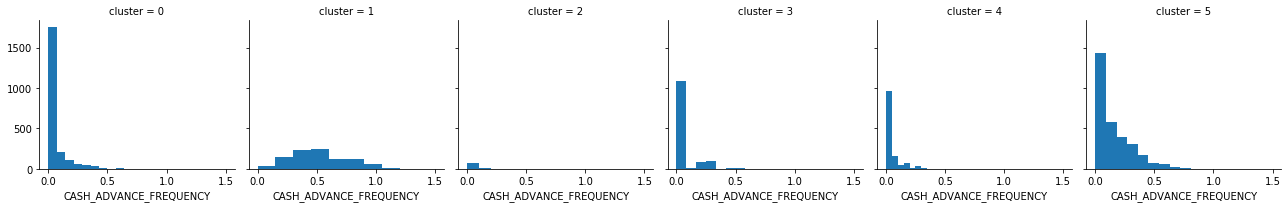

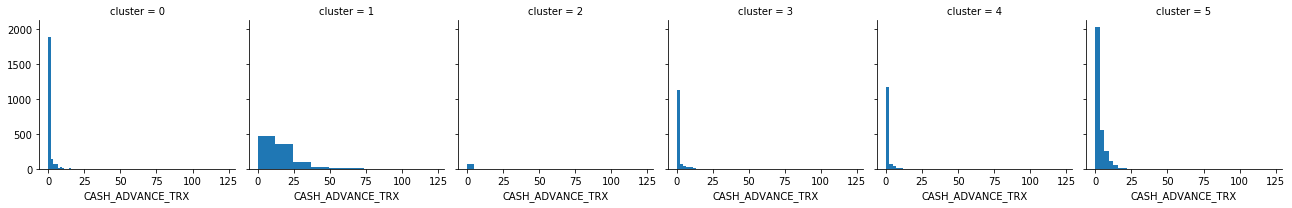

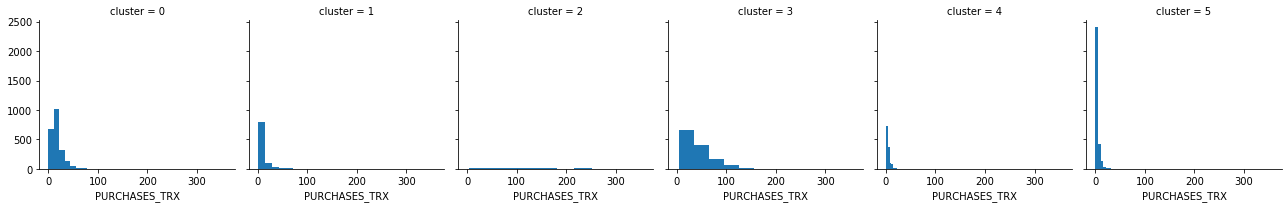

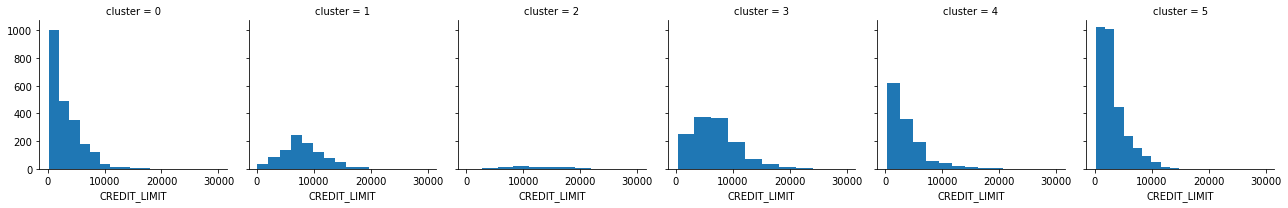

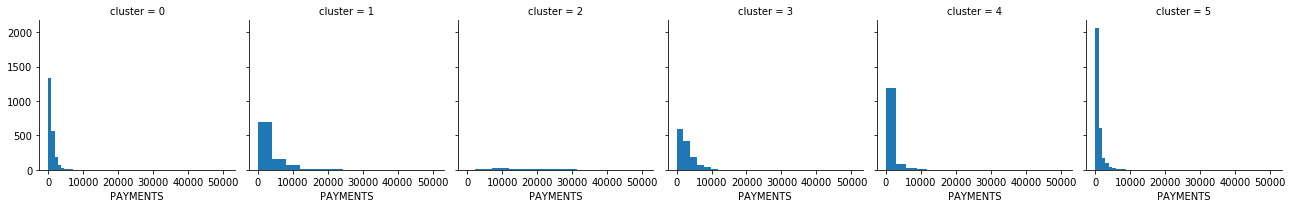

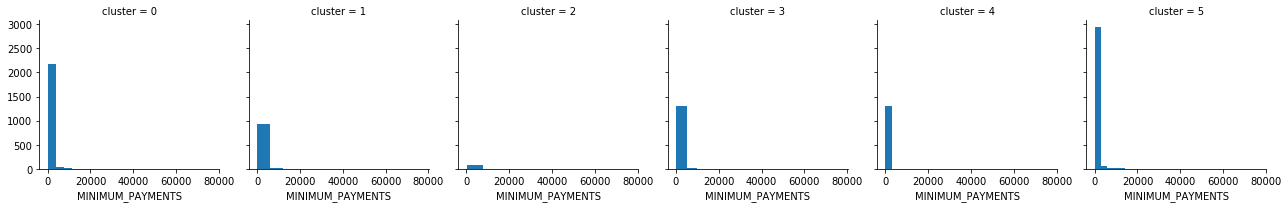

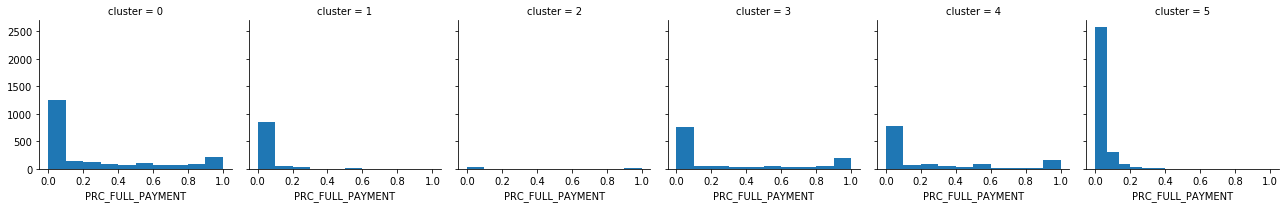

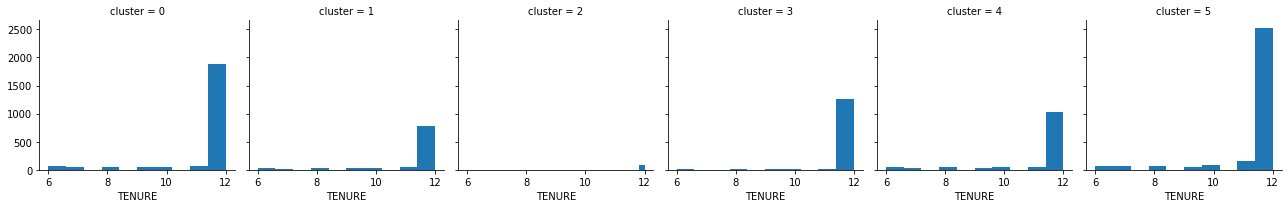

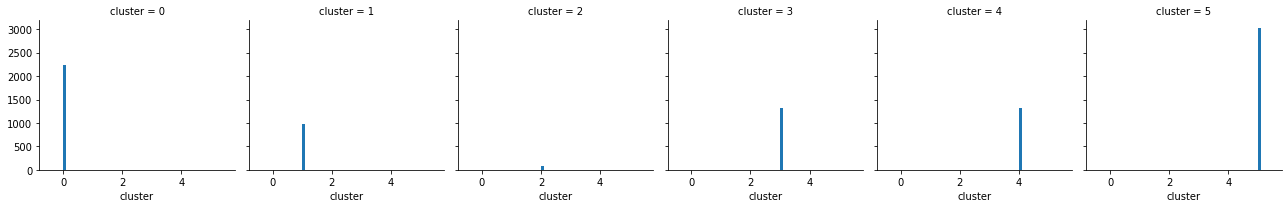

In [38]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)


In [39]:
X_principal.iloc[:,0]

0      -0.489949
1      -0.519099
2       0.330633
3      -0.481657
4      -0.563512
          ...   
8945    0.328693
8946    0.259752
8947    0.188818
8948   -0.313093
8949    0.012841
Name: P001, Length: 8950, dtype: float64

In [40]:
x, y = X_principal.iloc[:, 0], X_principal.iloc[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'who make all type of purchases', 
         1: 'more people with due payments', 
         2: 'who purchases mostly in installments', 
         3: 'who take more cash in advance', 
         4: 'who make expensive purchases',
         5:'who don\'t spend much money'}
  


In [41]:
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 

In [42]:
groups = df.groupby('label')

In [53]:
#for key, item in groups:
#    print(groups.get_group(key), "\n\n")

             x         y
5     0.336076 -0.235102
7     0.576473 -0.261947
10    0.605432 -0.247450
12    0.885903 -0.021828
13    0.766562  0.045284
...        ...       ...
8940  0.382929 -0.174865
8942  0.282890 -0.198583
8945  0.328693 -0.198294
8946  0.259752 -0.176869
8947  0.188818 -0.248156

[2229 rows x 2 columns] 


             x         y
1    -0.519099  0.544828
15    0.063951  0.689757
23    0.277455  0.792647
28   -0.148774  0.913033
30    0.331273  0.897961
...        ...       ...
8835 -0.011192  0.639415
8840 -0.000074  0.600035
8857 -0.098229  0.679198
8858 -0.396508  0.488613
8941 -0.074791  0.696443

[970 rows x 2 columns] 


             x         y
125   0.459725  0.405405
138   0.496311  0.612959
153   0.452003  0.848544
171   0.601305  0.659473
204   0.658293  0.501318
...        ...       ...
6390  0.688409  0.364969
6640  0.649059  0.380304
7046  0.324271  0.488622
7277  0.539816  0.473626
7553  0.578454  0.445361

[85 rows x 2 columns] 


             x     

In [51]:
df.groupby('label')

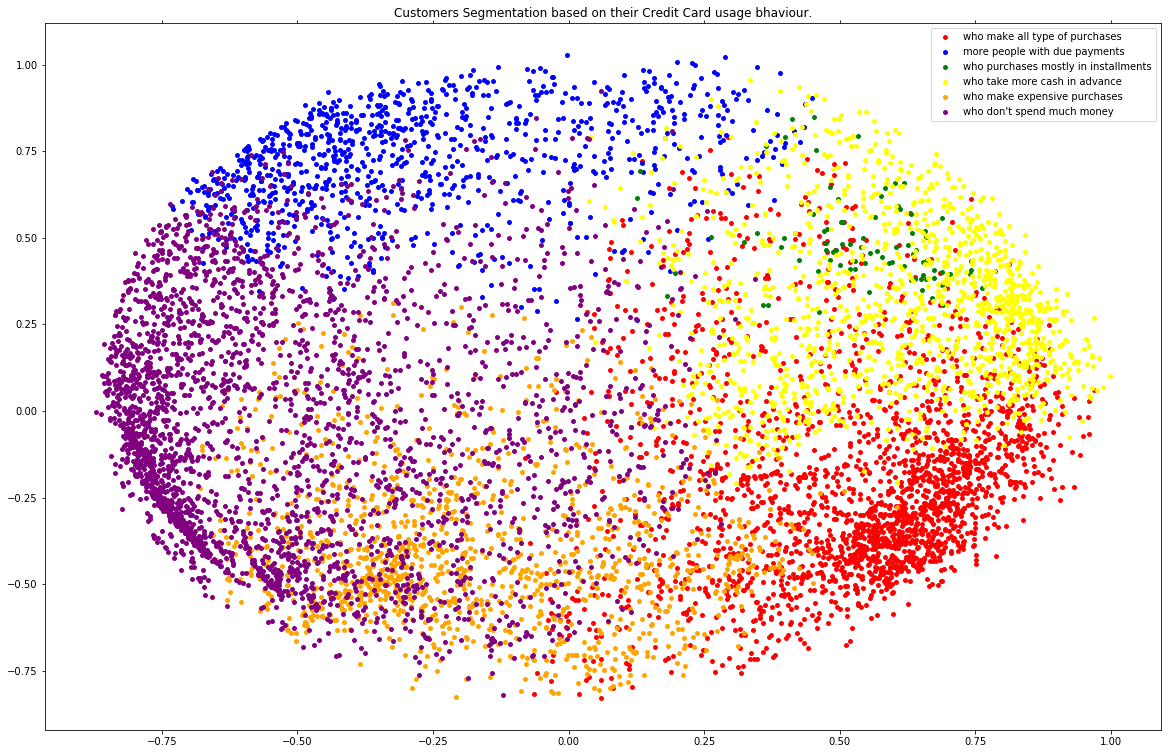

In [43]:
fig, ax = plt.subplots(figsize=(20, 13)) 
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

In [46]:
#Submission file
clusters.to_csv("Final_Submission_Clusters22Nov.csv")

In [55]:
predict(kmean, [])

NameError: name 'predict' is not defined

In [59]:
for i in kmean.labels_:
    print(i)

5
1
3
5
5
0
3
0
5
4
0
5
0
0
5
1
5
4
0
0
0
3
0
1
5
0
5
0
1
5
1
0
5
3
0
5
1
3
1
1
5
5
5
5
0
5
4
5
3
5
1
3
5
5
0
5
5
3
5
5
5
5
5
4
0
5
5
5
0
5
0
1
5
5
5
0
3
0
5
1
0
4
4
4
3
3
1
1
5
1
3
1
5
5
5
5
5
5
4
4
4
0
3
4
5
5
0
1
0
1
0
5
3
1
0
0
0
5
4
5
3
5
3
5
1
2
5
0
1
4
4
0
4
1
0
5
3
0
2
3
5
5
1
3
3
5
0
5
0
0
1
3
0
2
3
4
1
5
3
5
5
5
0
5
0
5
0
3
0
0
5
2
4
5
3
5
5
1
3
4
0
4
1
4
0
0
5
0
5
5
5
5
4
0
5
3
0
3
5
1
4
5
0
1
2
4
5
1
1
4
1
5
5
5
5
4
0
4
1
3
2
3
5
3
3
5
3
3
4
2
0
0
3
5
3
3
1
5
4
5
1
4
3
5
3
4
3
0
1
3
5
0
0
3
5
4
5
3
3
5
5
3
3
1
0
3
3
3
5
3
3
5
3
2
1
4
5
4
0
0
3
0
0
0
5
1
5
5
4
5
3
5
5
5
0
3
5
5
3
3
5
3
5
5
1
0
3
0
5
0
3
3
3
5
5
5
1
5
0
4
1
1
1
5
1
0
3
3
5
3
5
3
3
3
1
1
4
3
4
0
5
1
5
4
3
4
3
0
1
0
5
3
1
4
4
3
3
1
4
5
0
5
4
1
5
0
5
0
1
1
3
1
4
3
0
4
3
0
5
5
1
5
5
4
3
4
5
1
0
0
5
3
5
2
0
5
0
5
1
0
0
0
1
3
5
5
4
5
5
4
5
3
4
1
0
3
1
3
4
0
0
5
5
3
0
5
5
5
1
1
5
1
4
5
5
1
0
3
5
3
4
1
5
0
3
3
0
4
5
4
3
3
0
1
3
0
0
0
5
3
3
0
0
0
5
1
3
0
3
4
1
5
3
5
5
5
0
3
5
5
4
3
1
5
3
3
5
3
1
3
3
1
3
5
3
1
5
5
4
3


5
4
0
4
5
0
5
5
5
5
5
0
3
4
4
3
0
0
4
5
2
3
2
4
4
4
0
0
5
5
3
0
3
3
5
0
5
3
1
1
5
0
1
4
5
1
5
3
5
1
5
5
0
3
5
3
5
3
4
1
5
1
1
5
3
1
3
5
0
4
3
5
4
0
5
5
0
1
1
5
4
0
1
0
5
4
0
5
5
1
3
5
5
3
3
5
0
1
3
1
4
0
5
5
5
0
1
4
4
4
3
0
1
0
4
5
3
4
0
3
1
0
5
3
5
3
1
5
0
4
5
0
0
4
5
0
5
3
1
0
5
3
0
5
5
5
0
4
1
5
0
5
3
0
0
5
0
0
4
5
0
5
5
0
5
5
5
5
5
4
5
4
3
4
5
5
3
4
4
0
1
5
5
0
5
4
3
3
1
3
5
5
3
5
1
1
5
1
4
5
1
5
1
5
1
0
0
0
5
3
4
5
0
3
5
5
0
1
5
5
5
0
4
5
1
5
5
5
4
1
5
0
5
1
1
5
3
5
0
0
3
4
0
0
5
5
4
5
3
5
5
5
5
3
0
5
5
4
4
5
5
4
5
5
3
5
4
0
5
5
3
5
3
5
4
0
1
3
5
4
4
5
0
5
4
5
4
5
3
4
5
4
5
0
5
0
5
0
5
5
0
5
0
3
0
5
3
5
3
0
2
4
0
5
0
5
1
4
5
4
5
3
0
4
0
3
1
4
0
0
5
5
5
0
5
4
5
0
3
4
3
0
3
5
5
3
5
3
3
0
1
0
4
5
5
4
3
1
4
3
5
3
3
4
4
0
4
4
0
0
5
3
4
0
4
5
0
0
1
4
3
3
5
3
3
3
3
1
5
5
5
3
5
0
5
5
5
0
4
3
3
0
5
5
0
0
5
5
5
4
4
4
4
4
1
5
5
4
5
0
0
4
5
5
5
1
4
5
1
5
3
0
5
5
4
5
5
5
0
3
1
5
1
4
0
3
1
4
4
4
0
4
1
5
4
5
5
1
5
3
0
3
0
0
3
4
5
5
4
5
0
5
3
0
5
1
5
0
3
5
0
3
4
5
1
5
5
4
0
0
3
5
5
3
0
5
3
5
3
5
